# 用训练得到的模型预测

同济子豪兄 2023-2-15 6-11

## 进入MMSegmentation主目录

In [1]:
import os
os.chdir('../mmsegmentation')

In [2]:
os.getcwd()

'f:\\C_TRANSFER\\AI\\AI_demo\\DL\\openmmlab\\OpenMMlab_task4\\提交文件\\mmsegmentation'

## 导入工具包

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv
import cv2

## 载入配置文件

In [5]:
# 载入 config 配置文件
from mmengine import Config
cfg = Config.fromfile('pspnet-WatermelonDataset_20230612.py')

In [6]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner

register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/18 16:24:33 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3050
    CUDA_HOME: C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA\v11.7
    NVCC: Not Available
    MSVC: n/a, reason: fileno
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 193431937
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;

f:\C_TRANSFER\AI\AI_demo\DL\openmmlab\OpenMMlab_task4\提交文件\mmsegmentation\mmseg\models\backbones\resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
f:\C_TRANSFER\AI\AI_demo\DL\openmmlab\OpenMMlab_task4\提交文件\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
f:\C_TRANSFER\AI\AI_demo\DL\openmmlab\OpenMMlab_task4\提交文件\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


06/18 16:24:34 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/18 16:24:34 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

f:\C_TRANSFER\AI\AI_demo\DL\openmmlab\OpenMMlab_task4\提交文件\mmsegmentation\mmseg\engine\hooks\visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


## 载入模型

In [7]:
checkpoint_path = './work_dirs/Watermelon87_Semantic_Seg_Mask/iter_3000.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

Loads checkpoint by local backend from path: ./work_dirs/Watermelon87_Semantic_Seg_Mask/iter_3000.pth


## 载入测试集图像，或新图像

In [8]:
img = mmcv.imread('../watermelon.jpg')

## 语义分割预测

In [9]:
result = inference_model(model, img)

In [10]:
result.keys()

['seg_logits', 'pred_sem_seg']

In [11]:
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

In [12]:
pred_mask.shape

(300, 300)

In [13]:
np.unique(pred_mask)

array([0, 1, 2, 3, 4, 5], dtype=int64)

## 可视化语义分割预测结果

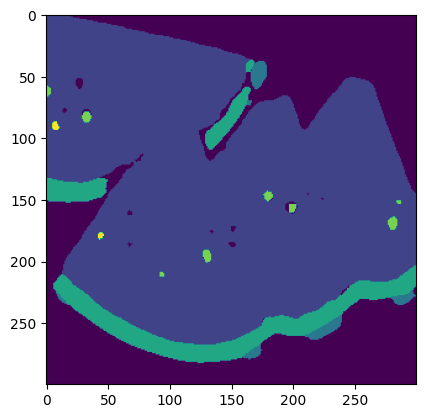

In [14]:
plt.imshow(pred_mask)
plt.show()

06/18 16:24:42 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


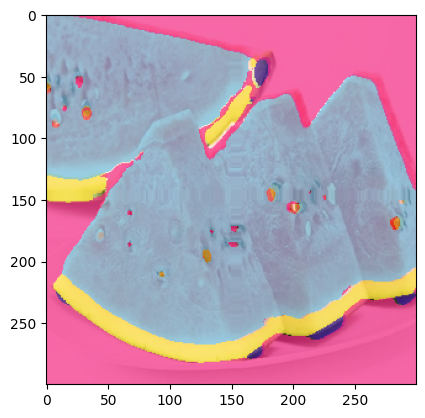

In [15]:
# 可视化预测结果
visualization = show_result_pyplot(model, img, result, opacity=0.7, out_file='pred.jpg')
plt.imshow(mmcv.bgr2rgb(visualization))
plt.show()

## 获取测试集标注

In [18]:
label = mmcv.imread('Watermelon87_Semantic_Seg_Mask/ann_dir/val/denn-ke-11-7.png')

In [19]:
label.shape

(300, 300, 3)

三个通道全部一样，只取一个通道作为标注即可。

In [20]:
label_mask = label[:,:,0]

In [21]:
label_mask.shape

(300, 300)

In [22]:
np.unique(label_mask)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

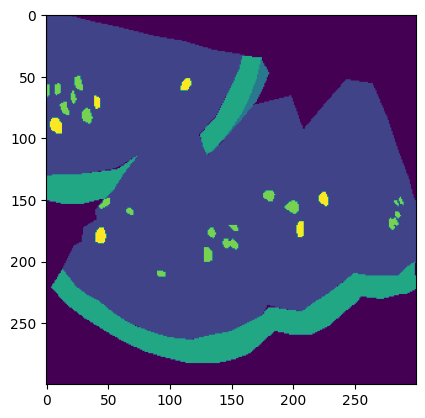

In [23]:
plt.imshow(label_mask)
plt.show()